# Leeds 2011: Car Accidents Severity Analysis and Classification
## By: Adham Gamal

## Project Overview:

The primary goal of this project is to analyze and classify car accidents' severity using the Leeds 2011 dataset, which consists of two main phases:

### Phase 1: Data Analysis

In this project, we conducted a comprehensive analysis of the Car Accidents Severity dataset, guiding our exploration through the following key steps:

---
---
---

## Libraries

In [1]:
import pandas as pd
from utils import plot_utils, data_utils

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
---
---

## Dataset

The data attached is about Car Accidents across Leeds City - UK for 2011. The outcome is to predict the variable which is highlighted in orange below:

- **Features Description**
    - **Reference Number:** A unique identifier for each accident.
    - **Easting and Northing:** Geographic coordinates of the accident location.
    - **Number of Vehicles:** The count of vehicles involved in the accident.
    - **Accident Date:** The date when the accident occurred.
    - **Time (24hr):** The time of day when the accident occurred in 24-hour format.
    - **1st Road Class:** Classification of the first road involved in the accident.
    - **Road Surface:** The condition of the road surface at the time of the accident (e.g., Wet/Damp, Dry).
    - **Lighting Conditions:** Illumination conditions at the accident site (e.g., Daylight, Darkness).
    - **Weather Conditions:** Weather conditions at the time of the accident.
    - **Casualty Class:** Classification of individuals involved in the accident (e.g., Driver, Pedestrian, Passenger).
    - **Sex of Casualty:** Gender of the individuals involved.
    - **Age of Casualty:** Age of the individuals involved.
    - **Type of Vehicle:** The type of vehicle involved in the accident.

<br>

- **Output Required**
    - **Casualty Severity:** The severity of the casualties (Slight, Serious, Fatal).


In [2]:
data = pd.read_excel('data/Road Accidents.xlsx')

In [3]:
data.head()

Reference Number  Easting  Northing  Number of Vehicles Accident Date  \
0         110016014   443330    439205                   2    2011-01-12   
1         110016024   425059    433371                   2    2011-01-12   
2         110016533   420683    434373                   1    2011-01-12   
3         110017112   431097    433000                   1    2011-01-12   
4         110020375   429523    433820                   2    2011-01-12   

   Time (24hr) 1st Road Class Road Surface  \
0          712           A(M)   Wet / Damp   
1          830   Unclassified   Wet / Damp   
2         1215              A   Wet / Damp   
3         1735              A          Dry   
4         1230              A          Dry   

                       Lighting Conditions          Weather Conditions  \
0        Darkness: street lighting unknown  Raining without high winds   
1          Daylight: street lights present  Raining without high winds   
2          Daylight: street lights present     Fine without high winds   
3  Darkness: street lights present and lit     Fine without high winds   
4          Daylight: street lights present     Fine without high winds   

  Casualty Class Casualty Severity Sex of Casualty  Age of Casualty  \
0         Driver            Slight            Male               62   
1         Driver            Slight          Female               39   
2     Pedestrian           Serious            Male               66   
3     Pedestrian           Serious            Male               39   
4         Driver            Slight            Male               29   

                          Type of Vehicle  
0                                     Car  
1                                     Car  
2                                     Car  
3  Goods vehicle 3.5 tonnes mgw and under  
4                                     Car

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reference Number     2604 non-null   int64         
 1   Easting              2604 non-null   int64         
 2   Northing             2604 non-null   int64         
 3   Number of Vehicles   2604 non-null   int64         
 4   Accident Date        2604 non-null   datetime64[ns]
 5   Time (24hr)          2604 non-null   int64         
 6   1st Road Class       2604 non-null   object        
 7   Road Surface         2604 non-null   object        
 8   Lighting Conditions  2604 non-null   object        
 9   Weather Conditions   2604 non-null   object        
 10  Casualty Class       2604 non-null   object        
 11  Casualty Severity    2604 non-null   object        
 12  Sex of Casualty      2604 non-null   object        
 13  Age of Casualty      2604 non-nul

---
---
---

## Data Cleansing

### Missing Data Analysis
There is no missing data.

In [5]:
data.isna().sum()

Reference Number       0
Easting                0
Northing               0
Number of Vehicles     0
Accident Date          0
Time (24hr)            0
1st Road Class         0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
dtype: int64

---

### Check Duplicates

In [6]:
data.duplicated().sum()

17

In [7]:
data.drop_duplicates(inplace=True)

---
---
---

## Feature Engineering

- **Drop `Reference Number` column:**
  - Since it is an ID and won't be used.

- **Convert `Easting` and `Northing` Coordinates to location:**
  - We may extract information from these geographical coordinates.

- **Handle `Accident Date` and format `Time(24hr)`:**
  - Validate and format date and time information. Enables time-based analysis.

- **Include columns for analysis:**
  - Columns such as `Number of Vehicles`, `1st Road Class`, `Road Surface`, `Lighting Conditions`, `Weather Conditions`, `Casualty Class`, `Sex of Casualty`, `Type of Vehicle` are essential for a comprehensive understanding.

- **Remove misformed and incorrect data:**
  - Necessary for data accuracy.

- **Convert ages to ranges:**
  - For simplifying age data, making it more interpretable.

**Note:**
- Perform exploratory data analysis (EDA) after that to gain insights into data distribution and relationships.

### Drop `Reference Number` column:

In [8]:
data.drop(columns=['Reference Number'], inplace=True)

---

### Convert `Easting` and `Northing` Coordinates to location:

- All locations are within: **Leeds, West Yorkshire, England, United Kingdom**.
- We will find the `Address`` then find the `District` to use it in our analysis.

Leeds Map:

Source: https://www.alamy.com/macro-closeup-of-a-page-in-a-printed-road-map-atlas-with-a-mans-hand-holding-a-magnifying-glass-showing-an-enlargement-of-the-city-of-leeds-england-image434265740.html

![Leeds Map](images/leeds_map.png)

In [9]:
data[['Easting', 'Northing']].head()

Easting  Northing
0   443330    439205
1   425059    433371
2   420683    434373
3   431097    433000
4   429523    433820

In [10]:
# data_utils.convert_coordinates_to_locations(data[0:5], 'Easting', 'Northing')

In [11]:
# data['Address'] = data_utils.convert_coordinates_to_locations(data, 'Easting', 'Northing')

- Now we can drop the `Easting`, `Northing` columns once we will never use them again.
- Then expand the Address and select useful columns from it.

In [12]:
data.drop(columns=['Easting', 'Northing'], inplace=True)

- All addresses are within **'Leeds, North Yorkshire, West Yorkshire, England, LS25 3AU, United Kingdom'**

- Addresses contain :
    - **122** Districts
    - **707** Street

<br>

- So I decided to extract only the first term **'Districts'** before **'Leeds'** which represent various locations, including towns, neighborhoods, and areas within **'Leeds'**.


In [13]:
# Function to extract the desired information
def extract_district(address):
    before_leeds = address.split(', Leeds')[0]
    parts = before_leeds.split(', ')
    return ', '.join(parts[-1:])

# Apply the function to the 'Address' column
# data['District'] = data['Address'].apply(extract_district).str.split(', ', expand=True)

---

### CheckPoint:
- It took 21 minute to find the addresses so I will save the dataframe as a checkpoint and start from here.

In [14]:
# data.to_excel('Road Accidents with Address.xlsx', index=False)
data = pd.read_excel('data/Road Accidents with Address.xlsx')

---

### Handle `Accident Date` and format `Time(24hr)`:

Extracting Date and Time Components:
- Month
- Day
- Hour

but before that we need to format the time first.

In [15]:
data['Formatted Time'] = data_utils.format_time(data, 'Time (24hr)')
data['Formatted Time'].head()

0    07:12
1    08:30
2    12:15
3    17:35
4    12:30
Name: Formatted Time, dtype: object

Now we can drop the `Time (24hr)` column

In [16]:
data.drop(columns=['Time (24hr)'], inplace=True)

Now let's Extract the components

In [17]:
data['Hour'] = data['Formatted Time'].str.split(':', expand=True)[0].astype(int)
data['Hour'].head()

0     7
1     8
2    12
3    17
4    12
Name: Hour, dtype: int32

In [18]:
data['Month'] = data['Accident Date'].dt.strftime('%b')
data['Month'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: Month, dtype: object

In [19]:
data['Day'] = data['Accident Date'].dt.day
data['Day'].head()

0    12
1    12
2    12
3    12
4    12
Name: Day, dtype: int32

---

### Remove misformed and incorrect data:

- We can check the unique values of categorical columns to verify if they are valid values or not
- We can check the min and max values of numerical column also to verify if thier values follow the sama pattern

#### Categorical Columns:

In [20]:
for column in data.select_dtypes(include=['object']).columns:
    print(f'{column:20s},', data[column].unique().tolist()[:15])

1st Road Class      , ['A(M)', 'Unclassified', 'A', 'B', 'Motorway']
Road Surface        , ['Wet / Damp', 'Dry', 'Frost / Ice', 5]
Lighting Conditions , ['Darkness: street lighting unknown', 'Daylight: street lights present', 'Darkness: street lights present and lit', 'Darkness: street lights present but unlit', 'Darkness: no street lighting']
Weather Conditions  , ['Raining without high winds', 'Fine without high winds', 'Fine with high winds', 'Unknown', 'Raining with high winds', 'Other', 'Fog or mist – if hazard']
Casualty Class      , ['Driver', 'Pedestrian', 'Passenger']
Casualty Severity   , ['Slight', 'Serious', 'Fatal']
Sex of Casualty     , ['Male', 'Female']
Type of Vehicle     , ['Car', 'Goods vehicle 3.5 tonnes mgw and under', 'Pedal cycle', 'Bus or coach (17 or more passenger seats)', 'Minibus (8 – 16 passenger seats)', 'Motorcycle over 500cc', 'Taxi/Private hire car', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 50cc and up to 125cc', 'Goods vehicle over 3.5

- The `Road Surface`` column should contain values like **'Wet / Damp', 'Dry', 'Frost / Ice'**, or other relevant categories related to road conditions. The presence of **'5'** seems like an anomaly or an error in the data.

- So dropping the rows with **'5'** is a data cleaning step aimed at ensuring data consistency, preserving integrity.

In [21]:
occurrences = len(data[data['Road Surface'] == 5])
# percentage = occurrences / len(data) * 100
print(f'Occurrences: {occurrences}')
# print(f'Percentage of occurrences: {percentage:.2f}%')

Occurrences: 1


In [22]:
data = data[data['Road Surface'] != 5]

---

#### Numerical Columns:

In [23]:
for column in data.select_dtypes(include=['number']).columns:
    print(f'{column:20s},', '\t', f'Min: {data[column].min():3d}', '\t', f'Max: {data[column].max():3d}')

Number of Vehicles  , 	 Min:   1 	 Max:   8
Age of Casualty     , 	 Min:   0 	 Max:  95
Hour                , 	 Min:   0 	 Max:  23
Day                 , 	 Min:   1 	 Max:  31


They have a well defined and valid value ranges without any outliers.

---

### Convert ages to ranges:
- The 'Age of Casualty' column contains a wide range of ages from 0 to 95. To improve performance and analysis clarity, we can group these ages into smaller age groups such as 0-9, 10-19, 20-29, and so on.
- This will help in better understanding age distribution patterns and reduce the impact of individual age values.

In [24]:
print('Unique Ages:', sorted(data['Age of Casualty'].unique()), '\n')
print('Number of unique Ages:', len(data['Age of Casualty'].unique()), '\n')

Unique Ages: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95] 

Number of unique Ages: 95 



In [25]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['Age Group'] = pd.cut(data['Age of Casualty'], bins=age_bins, labels=[f'{i}' for i in range(min(age_bins), max(age_bins), 10)], right=False)
print('Unique Age Groups:', sorted(data['Age Group'].unique()))

Unique Age Groups: ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90']


I will keep both `Age of Casualty` and `Age Group` till I finish the analysis.

---
---
---

## Analyzing feature distributions

### Categorical Features and Target:

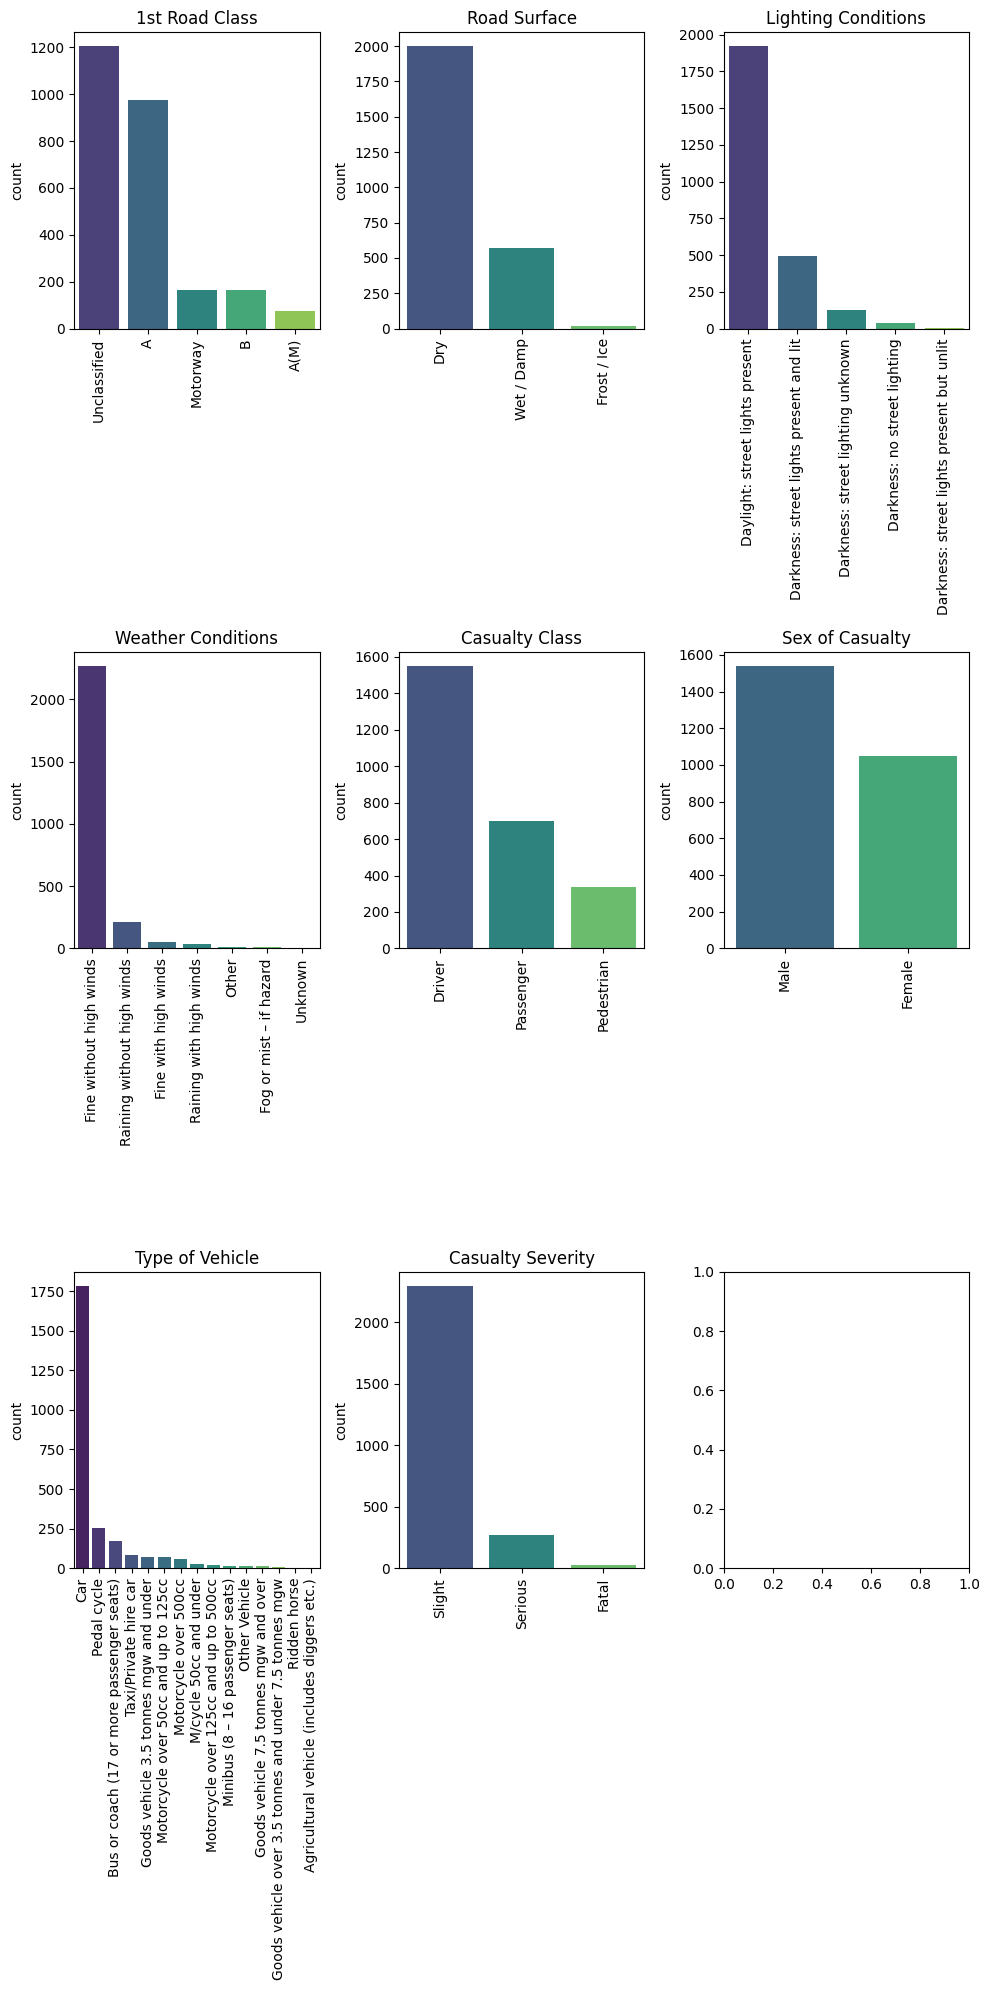

In [26]:
categorical_columns = ['1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Sex of Casualty', 'Type of Vehicle', 'Casualty Severity']
plot_utils.display_value_counts_with_order(df=data, columns=categorical_columns, cols_per_row=3, fig=(10, 20))

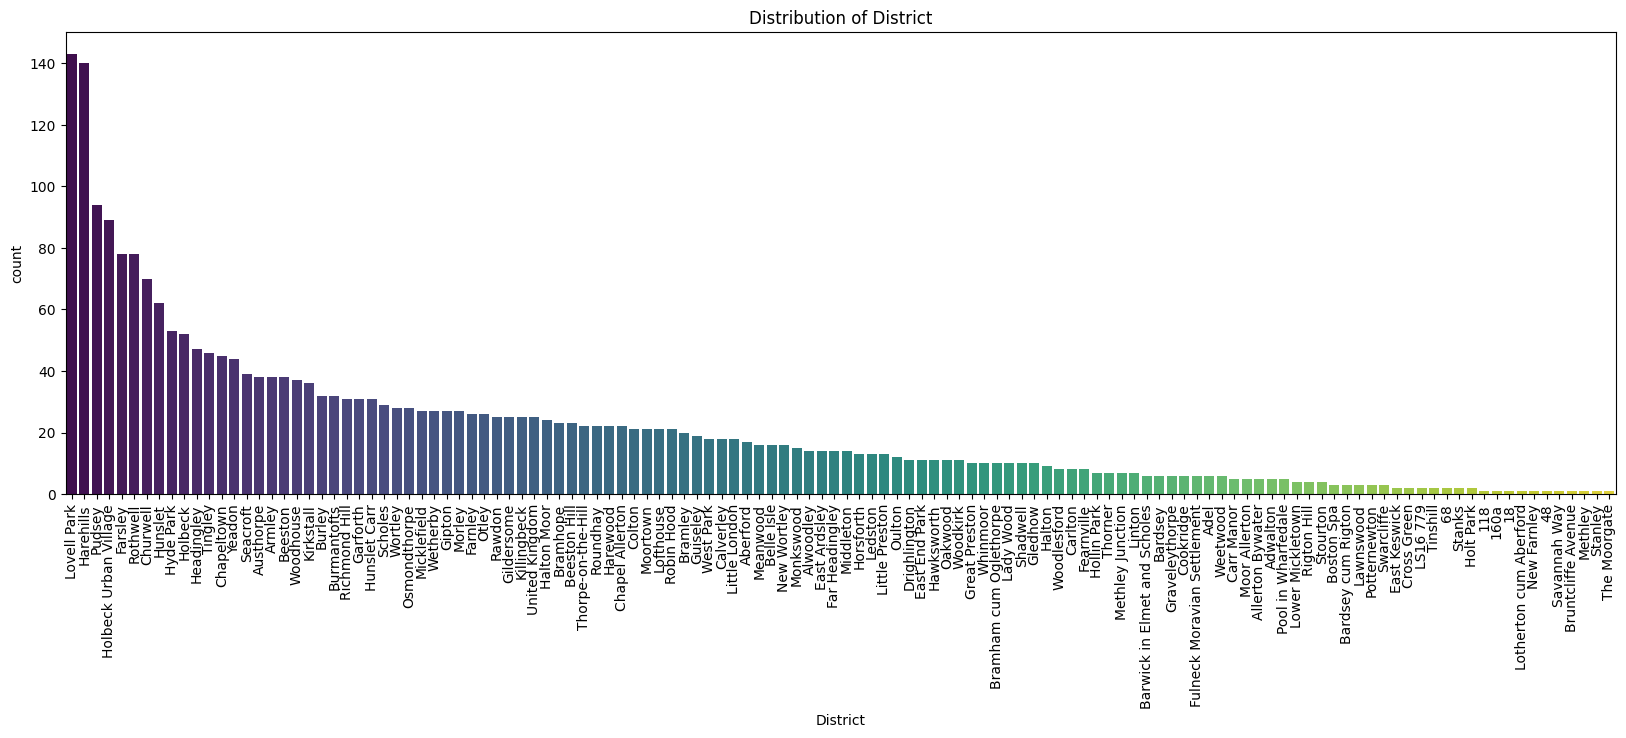

In [27]:
plot_utils.display_feature_distribution(data, 'District')

As shown in the above figure, data is not balanced in almost all the columns: So I'm thinking in:
- first: converting all categorical columns to [most Occurrence, other] to reduce the unbalance in data.
- second: over sampling based on the target column.

but I will do all that after selecting the best features and finish the analysis.

- Population: 751,485 (2011)
- Density: 1,388 people per square km.

- Population density in the 2011 census in the Leeds Metropolitan District Council area.

Source: https://en.wikipedia.org/wiki/Demography_of_Leeds

!['Leeds Population'](images/population_leeds.png)

Leeds Roads and Districts, it will help explaining the observations.

source: https://www.alamy.com/a-macro-closeup-of-a-page-in-a-printed-road-map-atlas-showing-the-leeds-and-bradford-conurbation-in-northern-england-image434265731.html

!['Leeds Map'](images/leeds_map2.png)

**Observations:**

- `District`: On the map, areas with a circular road or high population density tend to have a higher occurrence of accidents, which is a plausible reason for the increased frequency.

- `1st Road Class`: **A** roads, often featuring many circles, show a higher accident rate. **Unclassified** roads, likely smaller inner roads or connecting roads, also exhibit a higher accident rate. Conversely, **B**, **Motorway** and **A(M)** roads, known for being straight or wide, experience fewer accidents. We can categorize roads into three types: **Unclassified**, **A**, and **Other**.

- `Road Surface`: The data indicates that accidents are more prevalent on **Dry** roads. **Wet/damp** or **Icy/forest** roads, where drivers tend to be more cautious, have fewer reported accidents. Given the bias towards **dry** surfaces, it might be better to drop this feature.

- `Lighting Conditions`: Similar to road surface, accidents are more common during **Daylight**, even though drivers are generally more cautious in the dark. This may be influenced by well-lit streets during the night. Considering the bias towards daylight conditions, this feature could be dropped.

- `Weather Conditions`: Accidents are less frequent in **adverse** weather conditions, as drivers tend to exercise caution or avoid driving altogether. The data is biased towards **Fine** weather, suggesting a potential drop of this feature.

- `Casualty Class`: The majority of accidents involve the **Driver**, positioned at the front of the vehicle or often alone. We can categorize casualties into **Driver** and **Other**.

- `Sex of Casualty`: The data appears to be reasonably balanced in terms of gender distribution.

- `Type of Vehicle`: The dataset is skewed towards **Car** types, the most common vehicles. Options include either dropping this feature or simplifying it to **Car** and **Other**.

- `Casualty Severity`: Unfortunately, the target column is imbalanced, with a bias towards **Slight** severity and limited data for **Serious** and **Fatal** cases. To address this, oversampling could be considered to balance the dataset.


---

### Date Features:

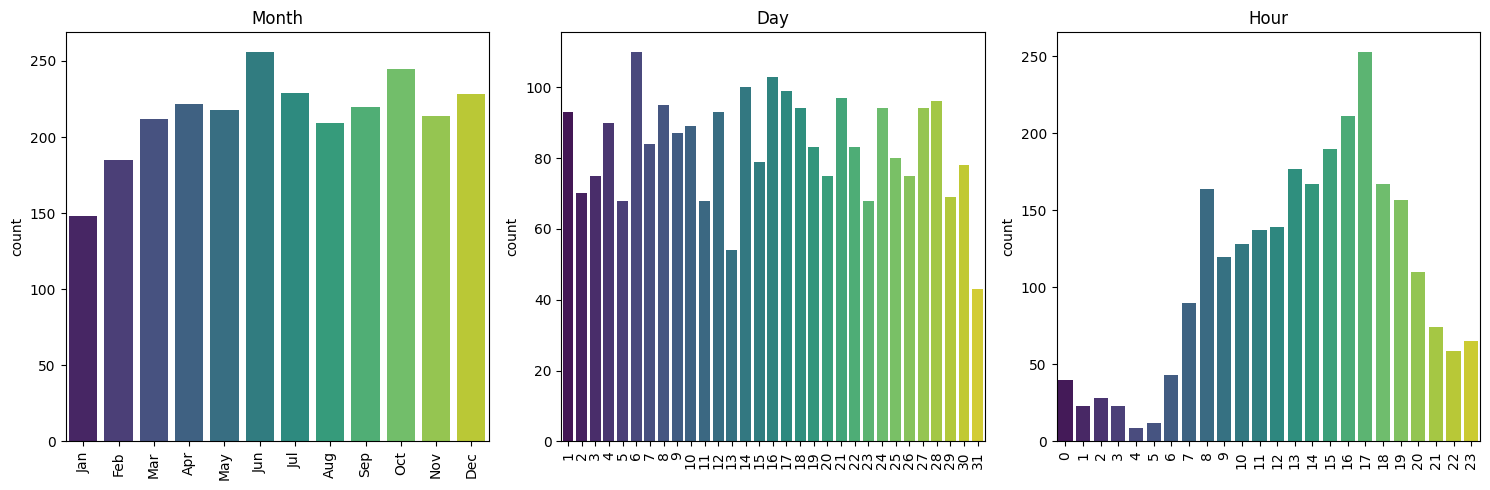

In [28]:
date_features = ['Month', 'Day', 'Hour']
plot_utils.display_value_counts(df=data, columns=date_features, cols_per_row=3, fig=(15, 5))

**Observations:**

- `Month`: The distribution suggests a relatively uniform occurrence of accidents across all months, with a noticeable dip in the early part of the year, probably due to year-end holidays.
  
- `Day`: Similar to the month distribution, accidents seem to happen consistently throughout the days without a significant variation. However, there are a couple of notable points. Firstly, on day **13**, there appears to be a decrease in accidents, possibly indicating increased caution on this superstitious day. Secondly, day **31** stands out as an exception, occurring irregularly across all months due to the varying number of days in each month.

- `Hour`: Notably, the distribution for hours exhibits two prominent peaks. The first peak occurs around 8 AM, coinciding with the morning rush as people head to work. The second peak is around 5 PM, aligning with the evening rush as individuals leave work. This observation aligns with the common patterns of commuting hours.

---

### Numerical Features:

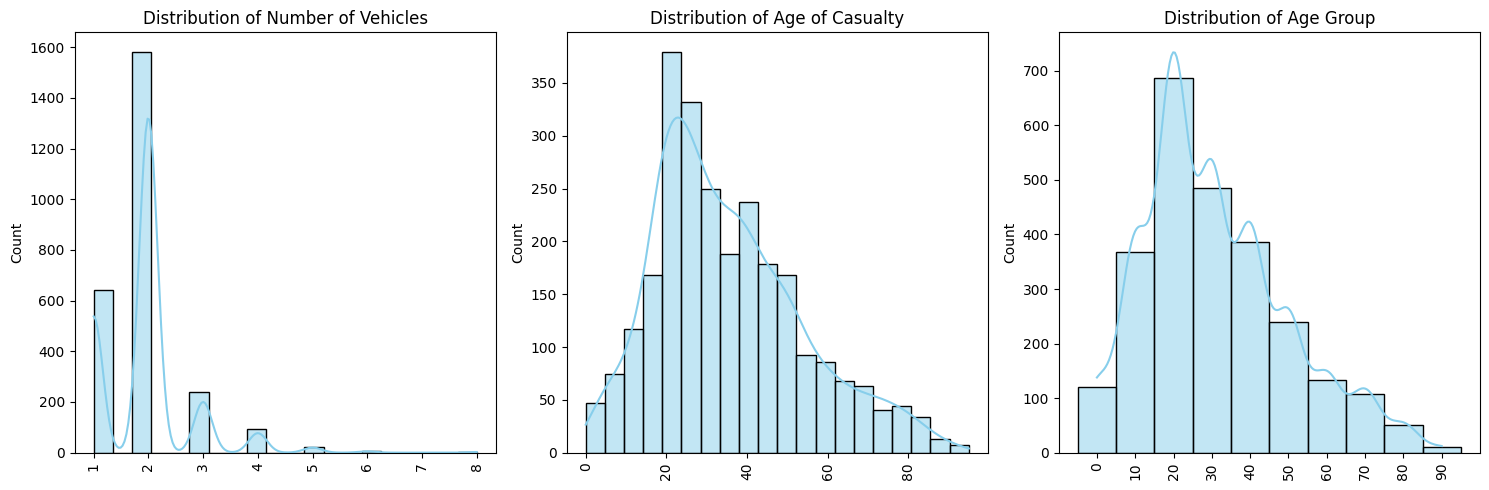

In [29]:
numerical_features = ['Number of Vehicles', 'Age of Casualty', 'Age Group']
plot_utils.display_distributions(df=data, columns=numerical_features, cols_per_row=3, fig=(15, 5))

Age Ranges in Leeds:

Source: https://www.ons.gov.uk/visualisations/censusareachanges/E08000035/

!['Leeds Ages'](images/ages_leeds.png)

**Observations:**

- `Number of Vehicles`: The histogram reveals that accidents mostly involve **2 vehicles**, and following that, accidents with only **1 vehicle** are notable. This pattern suggests that accidents with a single vehicle might involve pedestrians, a hypothesis worth exploring in further Exploratory Data Analysis (EDA).

- `Age of Casualty`: The age distribution spans **96** values from **0** to **95**. The histogram exhibits a slight left skew, suggesting a concentration of casualties primarily in the age range from the **late teens** and **early twenties** to the **late forties**, representing part of the population majority in **Leeds**.

- `Age Group`: This is a simplified representation of the `Age of Casualty`, emphasizing the same insight about the concentration of casualties in the mentioned age range.


---
---
---

## Update Columns

- Now, let's update the columns based on the observations and distribution analysis.
- Mainly, we'll drop the categorical features with an unbalanced distribution.
- We will keep the extracted date/time features [`Month`, `Day`, `Hour`] until we finish the EDA.
- We will keep these features [`Road Surface`, `Lighting Conditions`, `Weather Conditions`] for analysis also.
- Update the categorical features with **Other** instead of a small distribution over different values.

In [30]:
data.drop(columns=['District', 'Age of Casualty', 'Accident Date', 'Formatted Time', 'Address'], inplace=True)

In [31]:
data.head()

Number of Vehicles 1st Road Class Road Surface  \
0                   2           A(M)   Wet / Damp   
1                   2   Unclassified   Wet / Damp   
2                   1              A   Wet / Damp   
3                   1              A          Dry   
4                   2              A          Dry   

                       Lighting Conditions          Weather Conditions  \
0        Darkness: street lighting unknown  Raining without high winds   
1          Daylight: street lights present  Raining without high winds   
2          Daylight: street lights present     Fine without high winds   
3  Darkness: street lights present and lit     Fine without high winds   
4          Daylight: street lights present     Fine without high winds   

  Casualty Class Casualty Severity Sex of Casualty  \
0         Driver            Slight            Male   
1         Driver            Slight          Female   
2     Pedestrian           Serious            Male   
3     Pedestrian           Serious            Male   
4         Driver            Slight            Male   

                          Type of Vehicle  Hour Month  Day Age Group  
0                                     Car     7   Jan   12        60  
1                                     Car     8   Jan   12        30  
2                                     Car    12   Jan   12        60  
3  Goods vehicle 3.5 tonnes mgw and under    17   Jan   12        30  
4                                     Car    12   Jan   12        20

**Notes:**
- After starting the EDA, I found that some features need to be updated for more meaningful insights and to reduce the imbalance distribution, as follows:

  1. Combine `Type of Vehicle` different values into the main **4** classes:
    - Car: ['Car', 'Taxi/Private hire car']
    - Motorcycle: ['Pedal cycle', 'Motorcycle over 500cc', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 50cc and up to 125cc', 'M/cycle 50cc and under']
    - Bus: ['Bus or coach (17 or more passenger seats)', 'Minibus (8 – 16 passenger seats)']
    - Other: ['Goods vehicle 3.5 tonnes mgw and under', 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw', 'Other Vehicle', 'Goods vehicle 7.5 tonnes mgw and over', 'Ridden horse', 'Agricultural vehicle (includes diggers etc.)']
  2. Combine `1st Road Class` classes ['A(M)', 'B', 'Motorway'] to 'Other'.
  3. Combine `Number of Vehicles` classes [3, 4, 5, 6, 8] to 'Other'.

In [32]:
"""
Map these values to similar vehicle groups:
    - 'Car': ['Car', 'Taxi/Private hire car'],
    - 'Motorcycle': ['Pedal cycle', 'Motorcycle over 500cc', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 50cc and up to 125cc', 'M/cycle 50cc and under'],
    - 'Bus': ['Bus or coach (17 or more passenger seats)', 'Minibus (8 - 16 passenger seats)'],
    - 'Other': ['Goods vehicle 3.5 tonnes mgw and under', 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw', 'Other Vehicle', 'Goods vehicle 7.5 tonnes mgw and over', 'Ridden horse', 'Agricultural vehicle (includes diggers etc.)']
"""
data['Type of Vehicle'] = data['Type of Vehicle'].apply(data_utils.map_vehicle_type)


In [33]:
# Map these values to one group:
classes_to_combine = ['A(M)', 'B', 'Motorway']
data['1st Road Class'] = data['1st Road Class'].apply(lambda x: 'Other' if x in classes_to_combine else x)

In [34]:
# Map these values to one group:
classes_to_combine = [3, 4, 5, 6, 8]
data['Number of Vehicles'] = data['Number of Vehicles'].apply(lambda x: 'Other' if x in classes_to_combine else x)

In [35]:
"""
Map these values to only Dry or Wet
    - 'Dry': 'Dry'
    - 'Wet / Damp': 'Wet'
    - 'Frost / Ice': 'Wet'
"""
data['Road Surface'] = data['Road Surface'].map(lambda x: 'Dry' if x == 'Dry' else 'Wet')

In [36]:
"""
Map these values to only Darkness or Daylight
    - 'Darkness: no street lighting': 'Darkness',
    - 'Darkness: street lighting unknown': 'Darkness',
    - 'Darkness: street lights present and lit': 'Darkness',
    - 'Darkness: street lights present but unlit': 'Darkness',
    - 'Daylight: street lights present': 'Daylight',
"""
data['Lighting Conditions'] = data['Lighting Conditions'].map(lambda x: 'Daylight' if str(x).startswith('Daylight') else 'Darkness')

In [37]:
"""
Map these values to only Fine or Risky
    'Fine without high winds': 'Fine',
    'Other': 'Risky',
    'Unknown': 'Risky',
    'Fine with high winds': 'Risky',
    'Raining with high winds': 'Risky',
    'Fog or mist - if hazard': 'Risky',
    'Raining without high winds': 'Risky',
"""
data['Weather Conditions'] = data['Weather Conditions'].map(lambda x: 'Fine' if str(x).startswith('Fine without') else 'Risky')

In [38]:
data = data.astype(str)

In [39]:
data.head()

Number of Vehicles 1st Road Class Road Surface Lighting Conditions  \
0                  2          Other          Wet            Darkness   
1                  2   Unclassified          Wet            Daylight   
2                  1              A          Wet            Daylight   
3                  1              A          Dry            Darkness   
4                  2              A          Dry            Daylight   

  Weather Conditions Casualty Class Casualty Severity Sex of Casualty  \
0              Risky         Driver            Slight            Male   
1              Risky         Driver            Slight          Female   
2               Fine     Pedestrian           Serious            Male   
3               Fine     Pedestrian           Serious            Male   
4               Fine         Driver            Slight            Male   

  Type of Vehicle Hour Month Day Age Group  
0             Car    7   Jan  12        60  
1             Car    8   Jan  12        30  
2             Car   12   Jan  12        60  
3           Other   17   Jan  12        30  
4             Car   12   Jan  12        20

---
---
---

## EDA

Now that we've completed an exploration of the distribution of each feature and identified possible reasons for these distributions, let's delve deeper into the relationships between our features and the target column. Additionally, we'll examine the relationships between certain features and others.

### `Number of Vehicles` - `Casualty Class`:
- **Assumption:** If the number of vehicles is **1**, it is likely associated with a **Pedestrian**. 

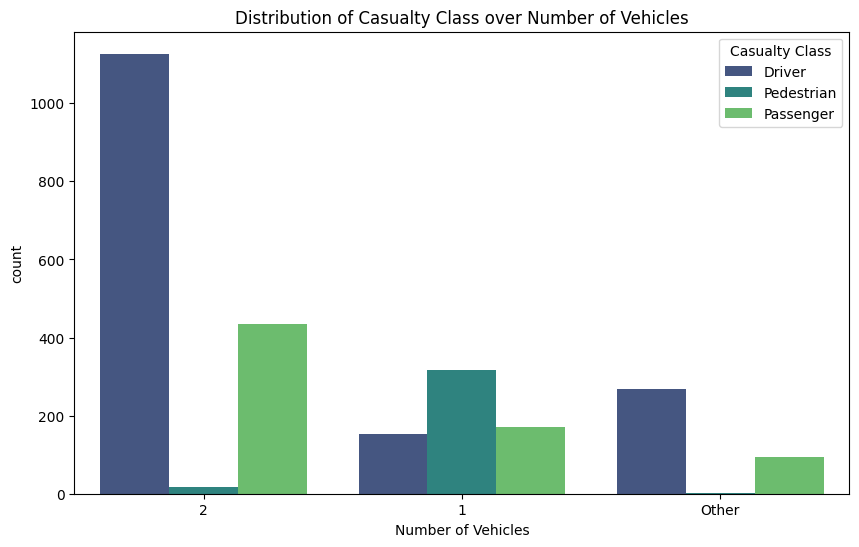

In [40]:
plot_utils.display_features_relationship(data, 'Number of Vehicles', 'Casualty Class')

**Observations:**

- As assumed, **pedestrians** are most associated with accidents that involve a single vehicle (`Number of Vehicles` = 1).
- **Drivers** are more likely to be affected by accidents when the `Number of Vehicles` is greater than or equal **2**.

---

### `1st Road Class` - `Casualty Class`:

- **Assumption:** **Unclassified** roads are often smaller inner roads, connecting roads, or parking areas, as **pedestrians** casualties are associated the most with them.

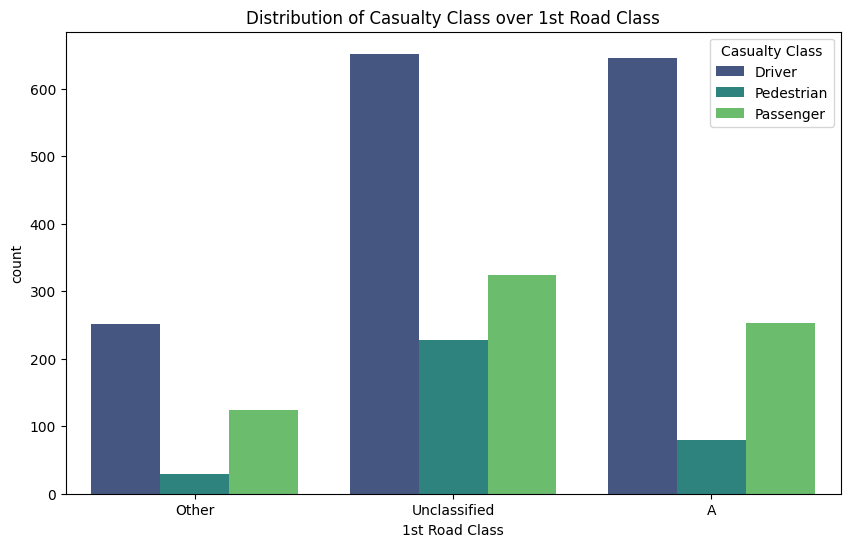

In [41]:
plot_utils.display_features_relationship(data, '1st Road Class', 'Casualty Class')

**Observations:**

- As assumed, **pedestrians** are most associated with accidents that involve **Unclassified** roads.
- **Drivers** are affected in all road types, but they are highly affected when the roads are **Unclassified** or of type **A**.

---

### `1st Road Class` - `Type of Vehicle`:
- Examine the types of vehicles involved in accidents on different road types.

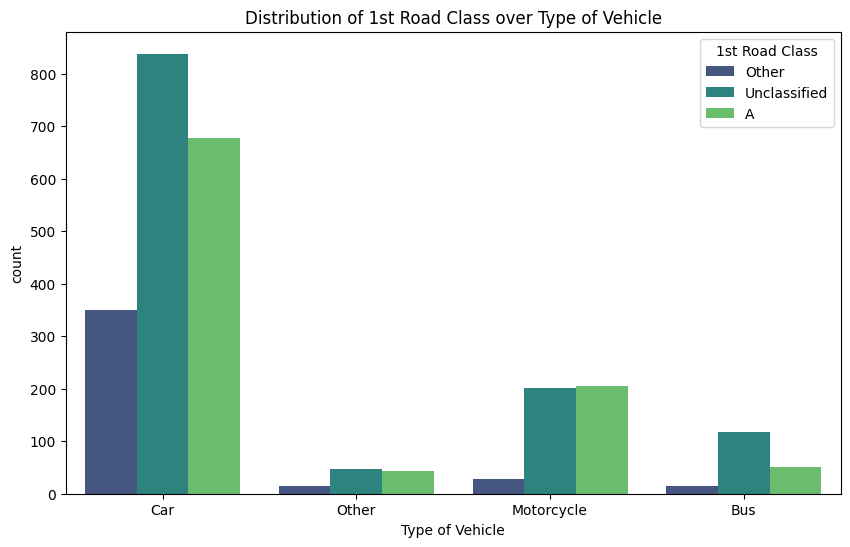

In [42]:
plot_utils.display_features_relationship(data, 'Type of Vehicle', '1st Road Class')

**Observations:**

- All vehicle types are observed across all road types, suggesting that accidents involve various vehicles on roads suitable for cars, motorcycles, buses, and others.
- **Vehicles** are most likely to have accidents when they are on **unclassified** roads, possibly due to narrow or crowded conditions, and when they are on **A** roads, potentially influenced by the presence of circular roads.

---

### `Type of Vehicle` - `Casualty Class`:
- Identify the most common types of vehicles associated with different classes of people.

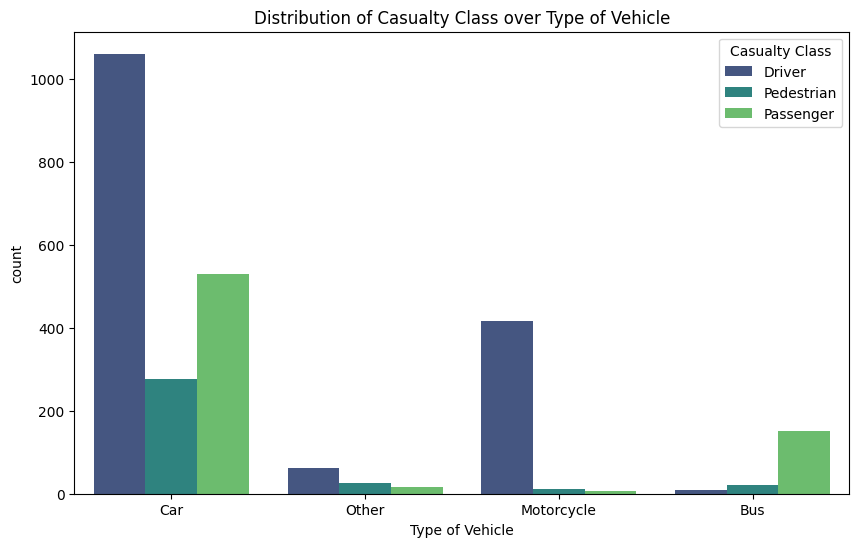

In [43]:
plot_utils.display_features_relationship(data, 'Type of Vehicle', 'Casualty Class')

**Observations:**

- **Passengers** are most associated with **cars** and **buses**, suggesting that these vehicle types are more likely suitable for accommodating more than one person.
- **Pedestrians** are most associated with **cars**, indicating that accidents involving **pedestrians** commonly occur with **cars** on the road.
- **Drivers** are most associated with both **cars** and **motorcycles**, which are commonly driven by a single person.

---

### `Each Feature` - `Casualty Severity`:
- Explore the relation between each feature and the target.

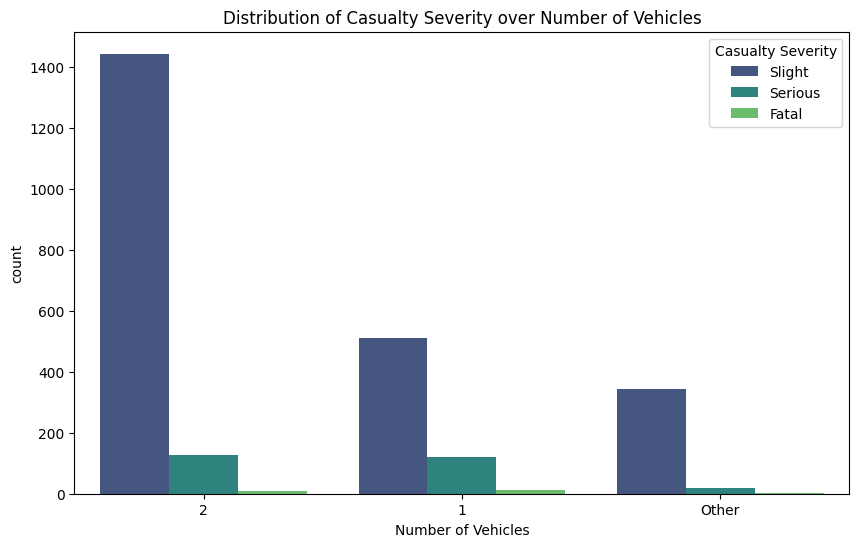

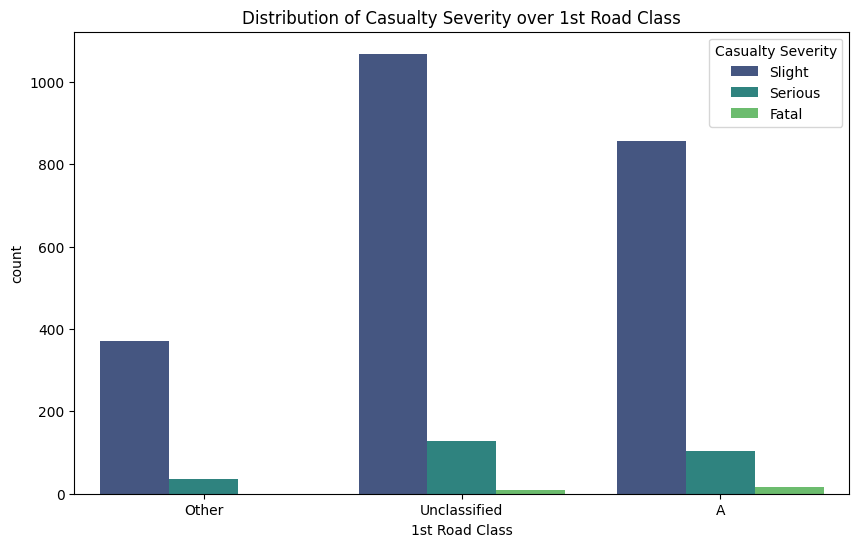

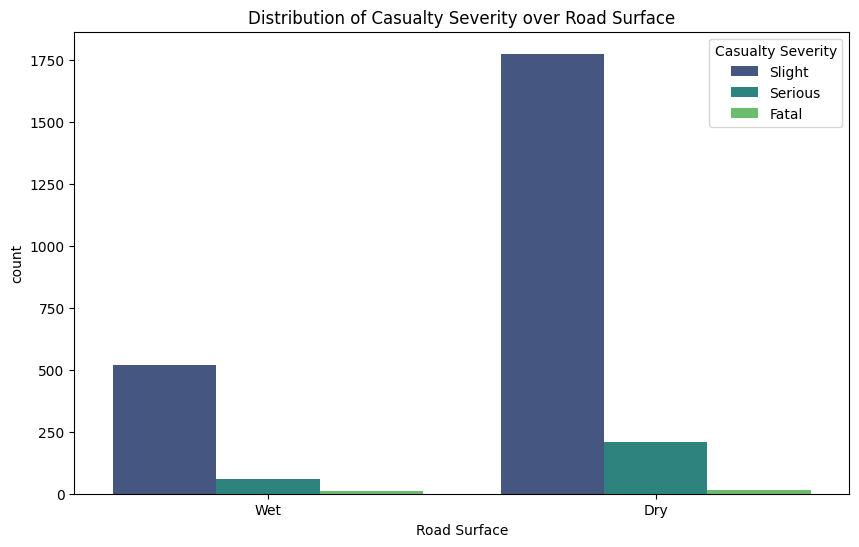

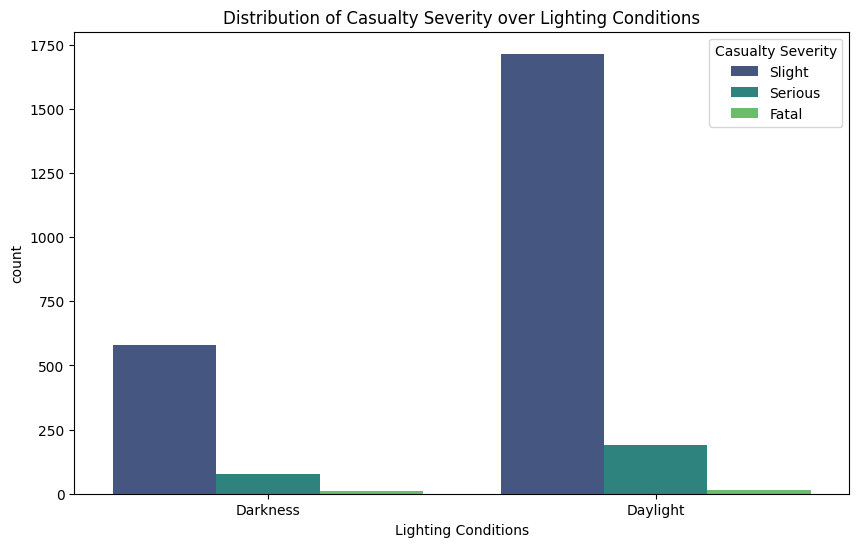

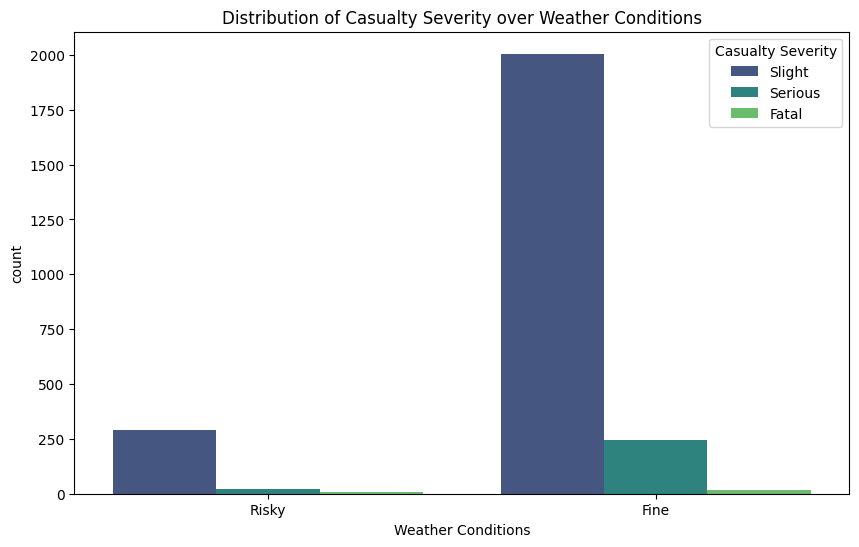

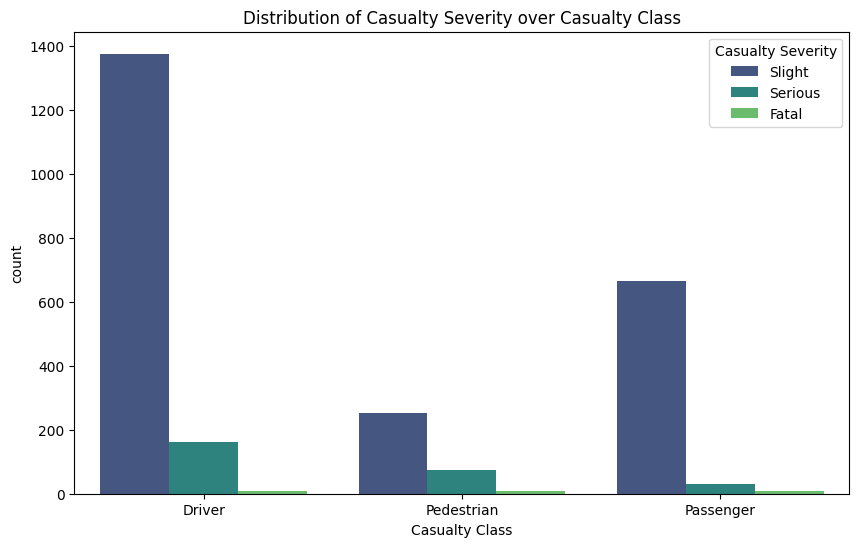

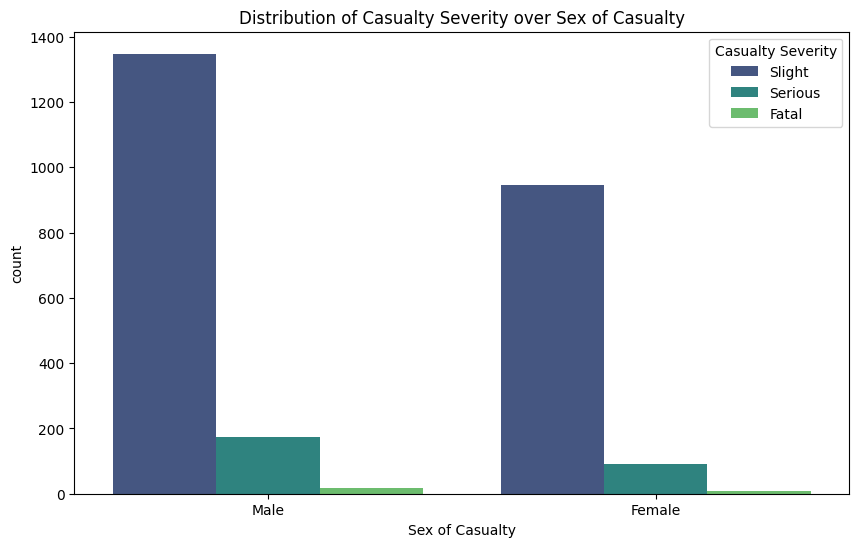

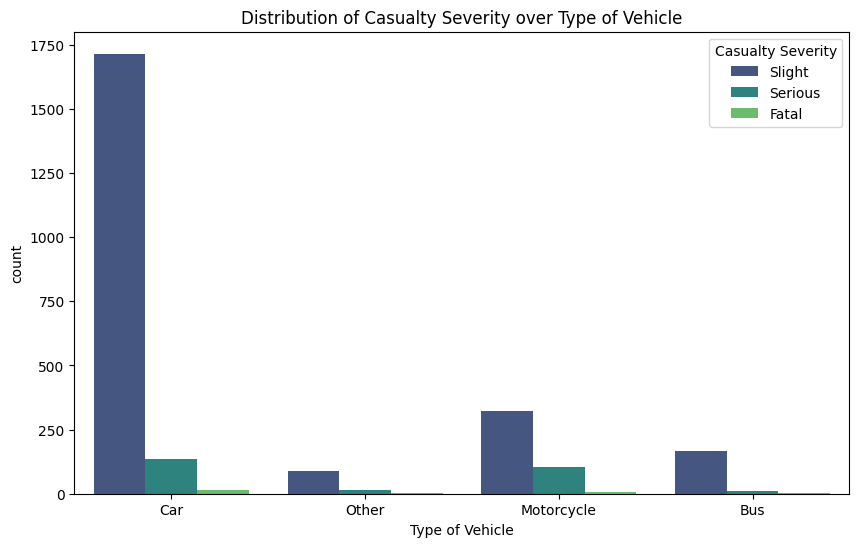

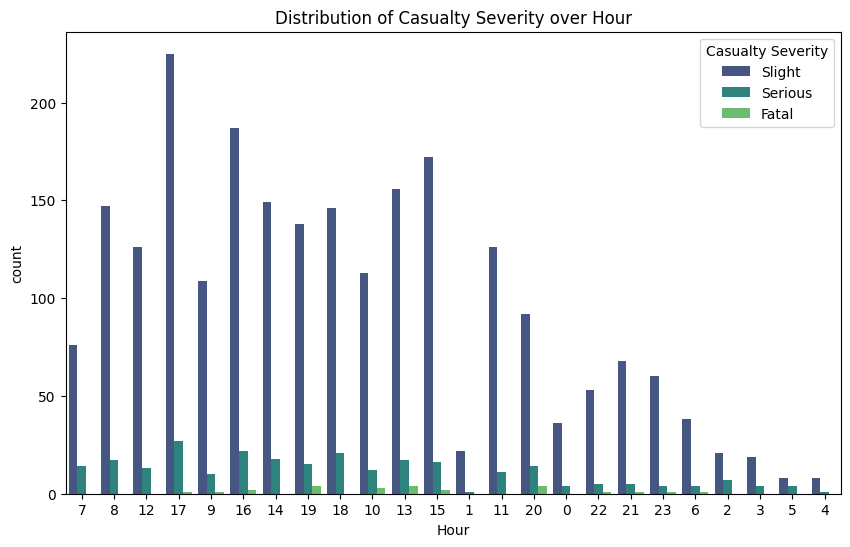

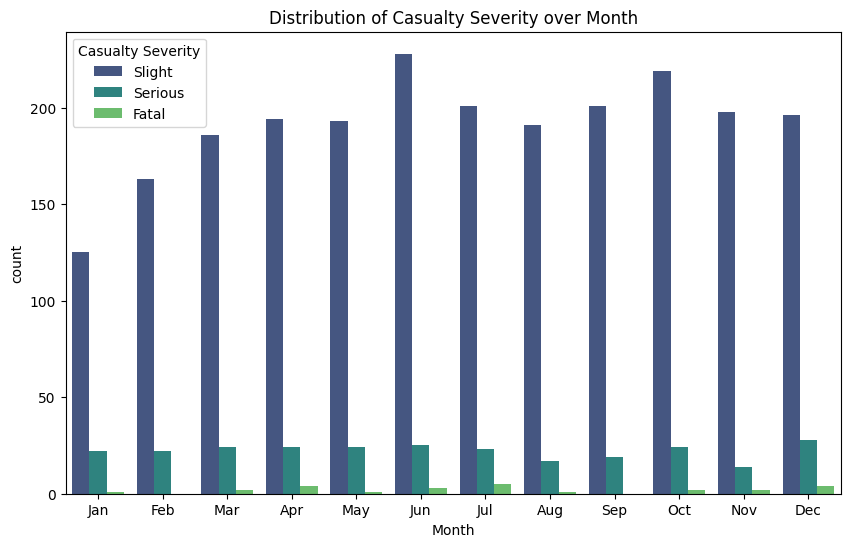

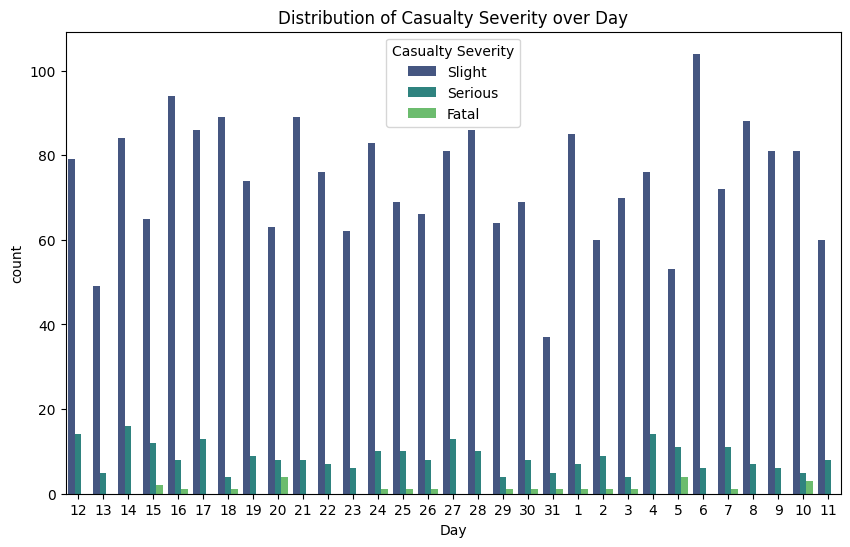

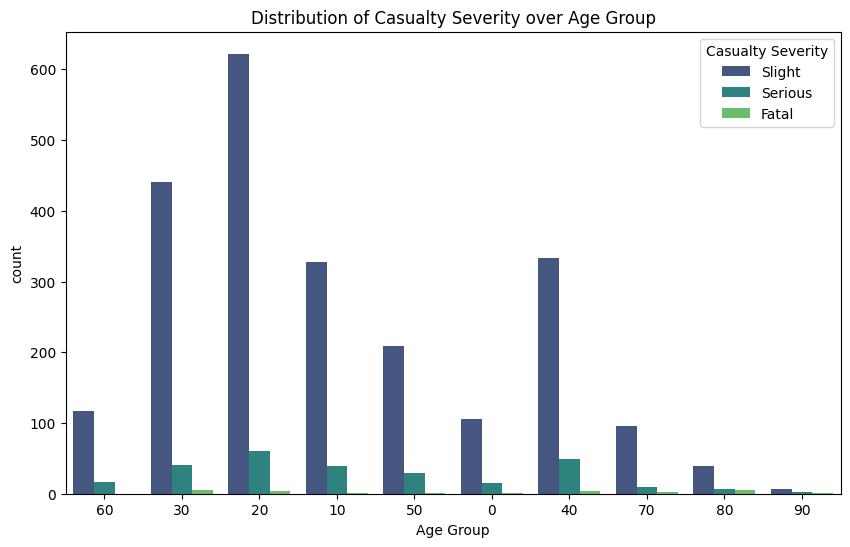

In [44]:
for column in data.columns:
    if column != 'Casualty Severity':
        plot_utils.display_features_relationship(data, column, 'Casualty Severity')

---

**Observations:**

- Due to the unbalanced distribution among severity classes, the majority class is prevalent across each feature's values. However, the second class is also distributed across different values for each feature. This challenges the identification of a strong/distinct relationship between these features and the target. Meanwhile, the last class is less distributed, but it still has a notable presence across each feature values.
- In other words, if the majority severity class is higher than the other values over a specific feature, we will find that respectively, the other severity classes are higher over other values too.

---
---
---

## More Data Preprocessing.

### Drop date columns

In [45]:
data.drop(columns=['Month', 'Day'], inplace=True)
data.head()

Number of Vehicles 1st Road Class Road Surface Lighting Conditions  \
0                  2          Other          Wet            Darkness   
1                  2   Unclassified          Wet            Daylight   
2                  1              A          Wet            Daylight   
3                  1              A          Dry            Darkness   
4                  2              A          Dry            Daylight   

  Weather Conditions Casualty Class Casualty Severity Sex of Casualty  \
0              Risky         Driver            Slight            Male   
1              Risky         Driver            Slight          Female   
2               Fine     Pedestrian           Serious            Male   
3               Fine     Pedestrian           Serious            Male   
4               Fine         Driver            Slight            Male   

  Type of Vehicle Hour Age Group  
0             Car    7        60  
1             Car    8        30  
2             Car   12        60  
3           Other   17        30  
4             Car   12        20

### Label encoding
Convert columns to numerical labels to ease the correlation process.

In [46]:
label_encoder = LabelEncoder()
preprocessed_data = data.apply(label_encoder.fit_transform)

---
---
---

## Features Correlation

- Use **Pearson** correlation for numerical data with a linear relationship.
- Use **Kendall** rank correlation or **Spearman's** rank correlation for ordinal or categorical data where the relationship might be monotonic but not necessarily linear.


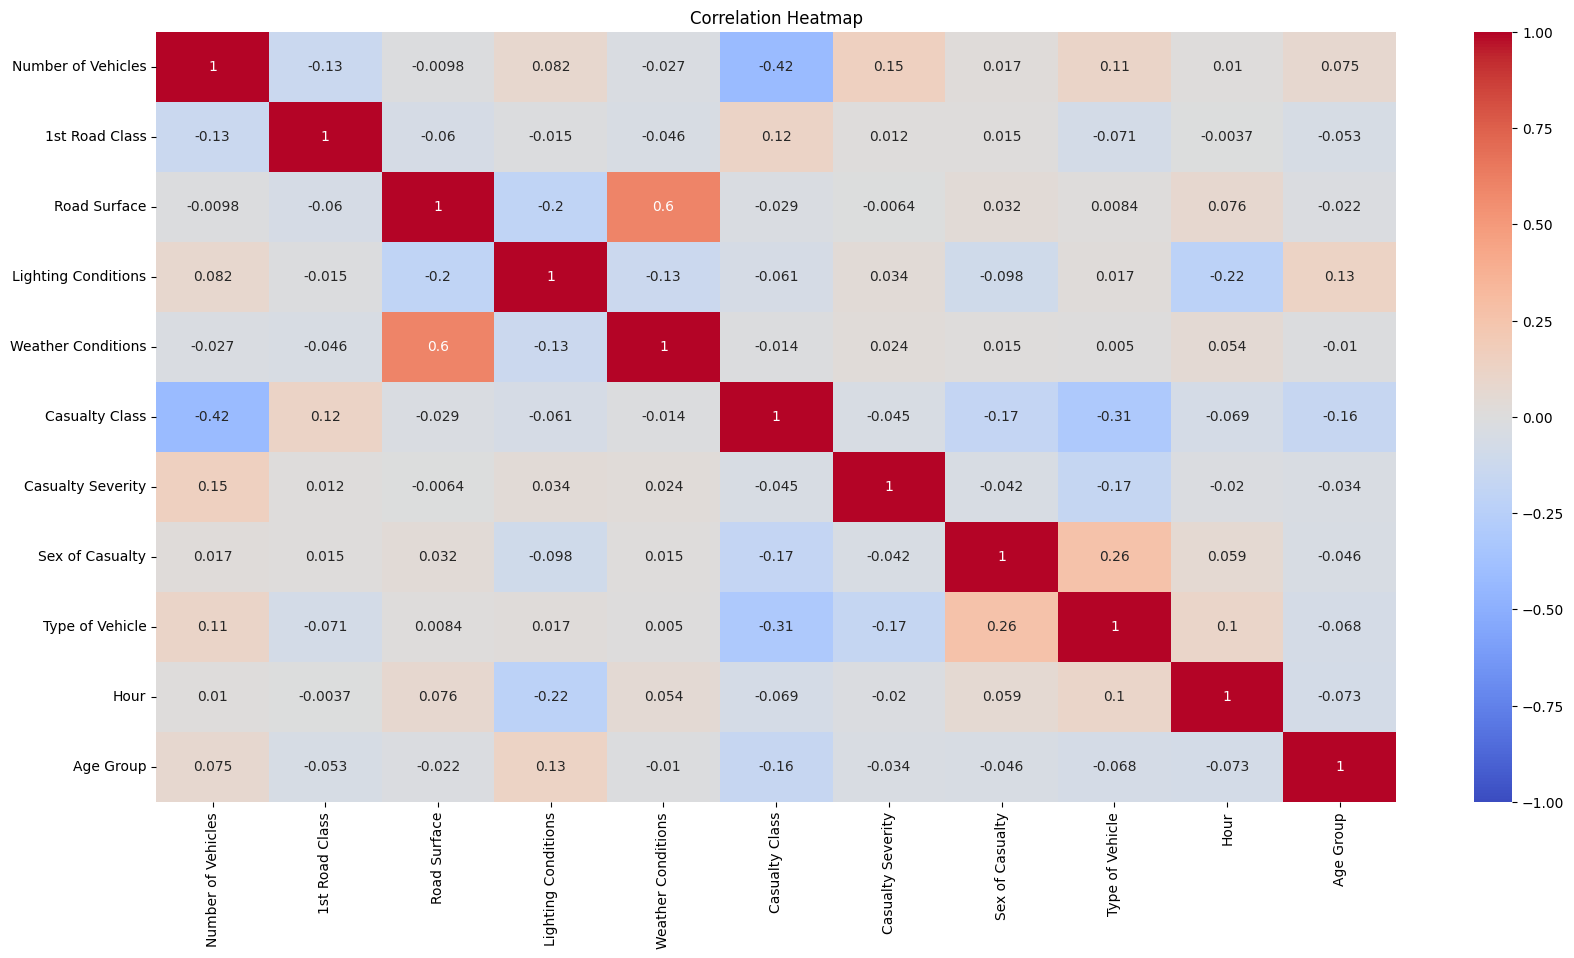

In [47]:
plot_utils.display_correlation(preprocessed_data, method='kendall')

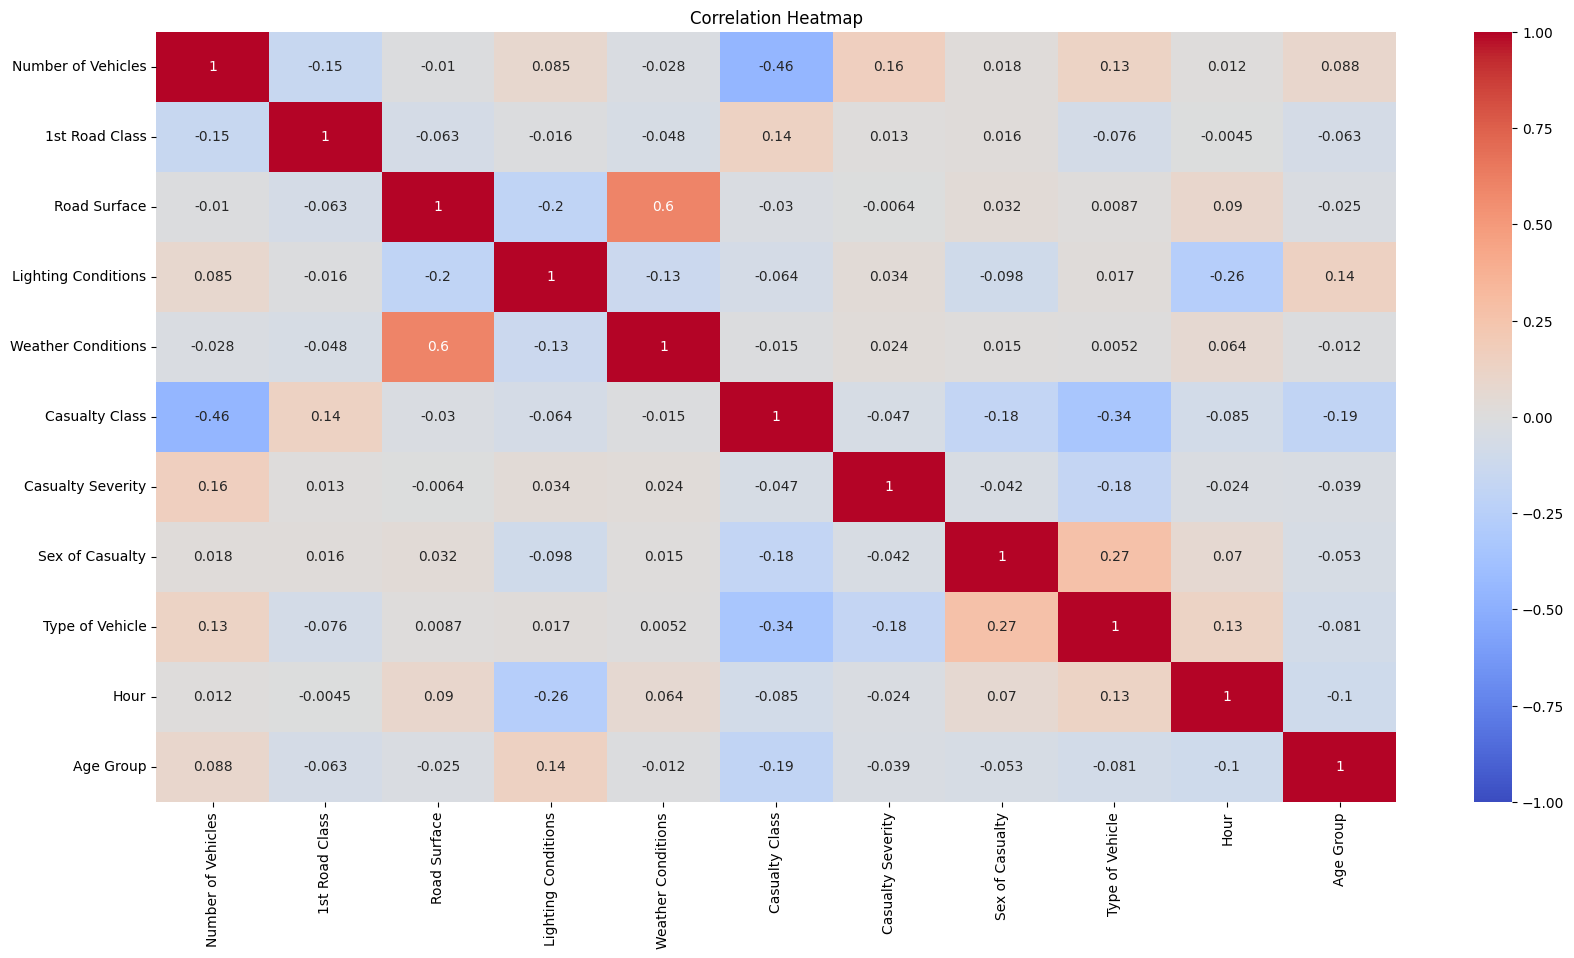

In [48]:
plot_utils.display_correlation(preprocessed_data, method='spearman')

**Observations:**

- The data primarily consists of categorical features, with only one numerical feature, `Number of Vehicles`.
- The small correlations observed between features and the target variable suggest a weak linear relationship, which is attributed to the nature of the data.
- This weak linear relationship, coupled with the categorical nature of the data, indicates the potential need to use complex models or tree-based models to capture more intricate patterns in the data.
- `Road Surface` and `Weather Conditions` are highly correlated, so we can drop one of them based on the correlation with the target variable, and in this case, it is suggested to drop `Road Surface`.


---
---

## Conclusion:

In this Notebook, we conducted a thorough analysis of the Car Accidents Severity dataset, encompassing the following key steps:

### Reading Data
- Loaded the dataset.

### Data Cleansing
- Handled missing data (the dataset had none).
- Addressed duplicates by removing them (the dataset had few).
- Resolved a misformed value in the `Road Surface` feature (the dataset had only one).

### Features Engineering
- Dropped unnecessary features, such as identifiers.
- Generated new features from existing ones, including:
  - `Address` derived from `Northing` and `Easting` coordinates.
  - `District` derived from `Address`.
  - `Hour` derived from `Time (24hr)`.
  - `Month` and `Day` derived from `Accident Date`.
- Reduced high cardinality in `Age of Casualty` by grouping its values.
- Explored the values and nature of each feature.

### Analyzing Features Distribution
- Displayed bar plots for each feature to understand their distribution (balanced or not) (almost all features has imbalanced distribution).
- Attempted to understand the reasons behind each distribution.
- Explored the meaning of each feature's values to gain insights.

### Update Features
- Grouped minority classes or values to reduce the imbalanced distribution.
- Dropped high cardinality features.

### Exploratory Data Analysis (EDA)
- Explored relationships between features to understand their dependencies.
- Investigated relationships between features and the target variable (data has almost equal distribution rate over different values).
- Identified reasonable insights from the EDA.

### More Data Preprocessing
- Dropped date features.
- Utilized label encoding for numerical representation of categorical features, to ease the process of computing the features correlation.

### Features Correlation
- Explored correlation methods suitable for categorical features, such as Spearman or Kendall.
- Found weak linear relationships between features and the target variable.
- Proposed the use of tree-based models, complex models or Naive Biyas for data modeling.